<div align="center">
  <h1><strong>Herencia</strong></h1>
  <strong>Hecho por:</strong> Juan David Argüello Plata
</div>


## __Introducción__

<div align="justify">

La relación de herencia facilita la reutilización de código brindando una base de programación para el desarrollo de nuevas clases. 

</div>

## __1. Superclase y subclases__

En la relación de herencia entre dos clases, se cataloga a las clases como _padre_ e _hija_. La clase hija (subclase) _hereda_ los __métodos__ y __atributos__ de la clase padre. Las subclases (clases hijas) emplean el siguiente formato:

```
  class clase_hija (clase_padre):
    //Atributos
    ...

    //Métodos
    ...
```

La clase padre suele usarse como un formato para la construcción de clases hijas. Un ejemplo de ello es la _calculadora científica_, que se puede catalogar como una subclase de la calculadora convencional.

In [ ]:
#Calculadora convencional
class Calculadora:
  def suma (self, x, y):
    return x+y;

  def resta (self, x, y):
    return x-y;
  
  def mult (self, x, y):
    return x*y;
  
  def div (self, x, y):
    return x/y

Además de las operaciones básicas, la clase de `Calculadora_cientifica` debería poder calcular el promedio de una lista numérica y la desviación estándar.

---

<div align="center">

<strong>Promedio</strong>

$$
\begin{equation}
  \bar{x} = \frac{\sum _{i=0} ^n x_i}{n}
\end{equation}
$$

<strong>Desviación estándar</strong>

$$
\begin{equation}
  s = \sqrt{ \frac{\sum _{i=0} ^n \left( x_i - \bar{x} \right)}{n-1} }
\end{equation}
$$

</div>

In [ ]:
#Calculadora científica
class Calculadora_cientifica (Calculadora):
  def promedio (self, numeros):
    return sum(numeros)/len(numeros)

  def desvest (self, numeros):
    promedio = self.promedio(numeros)
    des = 0;
    for num in numeros:
      des += (num-promedio)**2
    
    des /= (len(numeros)-1);
    return des**(1/2)

__Observa__ que al momento de crear un objeto del tipo `Calculadora_cientifica` es posible utilizar los métodos heredados de la clase `Calculadora`.

In [ ]:
calc1 = Calculadora_cientifica();

print("2+3 = " + str(calc1.suma(2,3)));

print("Promedio de: [2,3,10] = " + str(calc1.promedio([2,3,10])));

print("Desviación estándar de: [2,3,10] = " + str(calc1.desvest([2,3,10])));

En Python, durante la relación de herencia puede haber múltiples clases padre por cada hija.

## 1.1. Operadores __`self`__ y __`super()`__

<div align="justify">

El operador `self` se refiere a la clase _per se_. Se emplea dentro de la clase para especificar el uso de sus métodos y atributos. El operador `super()` se emplea en una relación de herencia para referirse explícitamente a los métodos y atributos de la clase padre. Es decir: en una relación de herencia, se emplea `self` para referirse a los métodos y atributos de la subclase (clase _hija_) y `super()` para los métodos y atributos de la superclase (clase _padre_).

</div>

### 1.1.1 Constructores

Tanto la superclase como las subclases pueden tener sus propios constructores. Si la superclase tiene un constructor, la sublcase  debe emplear el operador `super().__init__(entradas)` para ejecutarlo. 

Por ejemplo, supongamos la situación de un estudiante. Se puede asumir que la clase de `Student` deriva de la clase `Person`, como se aprecia en el diagrama UML.

<div align="center">

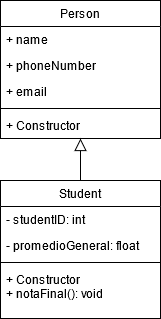

</div>

In [ ]:
class Person:
  name = ""
  phoneNumber = ""
  email = ""

  def __init__(self, nombre, numero, mail):
    self.name = nombre;
    self.phoneNumber = numero;
    self.email = mail;

class Student (Person):
  studentID = 0
  promedioGeneral = 0

  def __init__(self, nombre, telefono, email, studentID):
    super().__init__(nombre, telefono, email)
    self.studentID = studentID;

#---------------------------------Creación de personas y estudiantes------------------

john = Student("John Pérez", 302010, "john@gmail.com", 10010)

print(john.name)

En ese contexto, el operador `super` se refiere explícitamente a la superclase, mientras que el operador `this` se emplea para trabajar con los atributos y métodos de la subclase.

### Ejemplo:

Elabora una clase _padre_ `Animal` para construir clases hijas: `Oso`, `Tigre` y `Perro`. Puedes emplear el diagram UML como sugerencia.


<div align="center">
  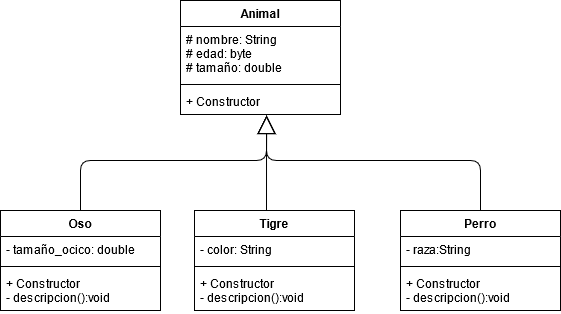
</div>


In [ ]:
#---------------------Clase padre---------------------------
class Animal:
  nombre=""
  edad=0
  tamaño=0

  def __init__(self, nombre, edad, tamaño):
    self.nombre = nombre;
    self.edad = edad;
    self.tamaño = tamaño;

#------------------Clases hijas----------------------------
class Oso (Animal):
  tamaño_ocico=0

  def __init__(self, nombre, edad, tamaño, tamaño_ocico):
    super().__init__(nombre, edad, tamaño);
    self.tamaño_ocico = tamaño_ocico;

    self.descripcion();

  def descripcion(self):
    print(self.nombre + " es un oso de " + str(self.edad) +" años y tiene un ocico de " + str(self.tamaño_ocico) + " metros.");

class Tigre (Animal):
  color=""

  def __init__(self, nombre, edad, tamaño, color):
    super().__init__(nombre, edad, tamaño);
    self.color = color;

    self.descripcion();

  def descripcion(self):
    print(self.nombre + " es un tigre de " + str(self.edad) +" años y tiene un color " + str(self.color));


#-----------------------------Ejemplos----------------------------------------

Tigre = Tigre("Malo", 3, 2.2, "Amarillo");



## __2. Polimorfismo__

_Polimorfismo_ se deriva de las palabras griegas "poli", que significa muchos, y "morphe", que significa formas. En programación, se emplea este concepto para cambiar el contenido de un método heredado para que se ajuste a las necesidades principales de las subclases.

Existen dos tipos de polimorfismo: _dinámico_ y _estático_.

### 2.1. Polimorfismo dinámico

Se conoce también en la literatura como _polimorfismo en tiempo real_, _vinculación dinámica_ o _anulación de método_ ("overriding", por su traducción al inglés). La multiplicidad de formas ocurren en diferentes clases.

Supongamos que en la relación de herencia entre una clase padre e hija existen métodos con el mismo nombre, pero en diferentes formas. Cuando un objeto es asignado a una _referencia de clase_ y el método del objeto es llamado, el método del objeto de la clase se ejecuta; más no el de la clase referencia.

Dado que la creación del objeto ocurre en tiempo real, la forma en como se ejecuta el método sólo puede ser decidido cuando se ejecuta el método.

Por ejemplo: una figura geométrica tiene un área y un perímetro; pero la forma de la figura define la manera en cómo se calcula.


In [ ]:
from math import pi

#CLASE PADRE
class FiguraGeometrica:
  dimensiones = []
  ubicacionEspacial = [0,0]

  def Area(self):
    return None
  
  def Perimetro(self):
    return None

#CLASES HJIAS
class Circulo(FiguraGeometrica):
  def __init__(self, radio, ubicacion = [0,0]):
    self.dimensiones.append(radio)
    self.ubicacionEspacial = ubicacion
  
  def Area(self):
    return pi*self.dimensiones[0]**2
  
  def Perimetro(self):
    return 2*pi*self.dimensiones[0]


class Rectangulo(FiguraGeometrica):
  def __init__(self, b, h, ubicacion=[0,0]):
    self.dimensiones.append(b)
    self.dimensiones.append(h)
    self.ubicacionEspacial = ubicacion
  
  def Area(self):
    return self.dimensiones[0]*self.dimensiones[1]
  
  def Perimetro(self):
    return 2*(self.dimensiones[0]+self.dimensiones[1])


#---------------------CREACIÓN DE FIGURAS-----------------------
cir1 = Circulo(0.5)
rec1 = Rectangulo(3,4)

print("Círculo de radio " + str(cir1.dimensiones[0]) + " tiene un área de " + str(cir1.Area()))
print("Rectángulo de " + str(rec1.dimensiones[0]) + " de base por " + str(rec1.dimensiones[1]) + " de altura tiene un área de " + str(rec1.Area()))

### 2.2. Polimorfismo estático

Conocido también como _polimorfismo en tiempo de compilación_, _vinculación estática_ o _sobrecarga de métodos_. Consiste en tener múltiples métodos con el mismo nombre pero diferentes argumentos de entrada. Se escoge el método dependiendo de cuántas entradas pase el usuario. Por ejemplo: en una calculadora, es posible sumar dos o tres números.



In [ ]:
class Calculadora:
  def suma(self, x=0, y=0, z=0):
    return x+y+z

calc = Calculadora();

print("Suma de dos números: " + str(calc.suma(5,10)));
print("Suma de tres números: " + str(calc.suma(5,10,4)));

El constructor es un método que permite realizar un desarrollo particular en el momento en que se crea un objeto. También es posible sobrecargar el constructor de una clase dependiendo de las entradas que ingresa un usuario.

In [ ]:
class Persona:
  nombre = ""
  cedula = 0

  def __init__(self, nombre:str ="", cedula:int=0):
    if cedula == 0 and nombre == "":
      print("Se creó una persona desconocida")
    elif nombre == "":
      self.cedula = cedula
      print("La persona está identificada por C.C." + str(self.cedula))
    elif cedula == 0:
      self.nombre = nombre
      print("Se creó a " + self.nombre)
    else:
      self.nombre = nombre
      self.cedula = cedula
      print("Se creó a " + nombre + " con C.C." + str(cedula))

In [ ]:
#Sin argumentos de entrada...
juan = Persona()

In [ ]:
#Sólo el nombre
juan = Persona("Juan")

In [ ]:
#Sólo la cédula
juan = Persona(cedula=1098)

In [ ]:
#Toda la información solicitada
args = {"nombre":"Juan", "cedula":1098}
juan = Persona(**args)

## __3. Ejercicios__

### 3.1. _Toppings_

Eres el dueño de una franquicia de Zirus Pizza. Establece una relación de herencia en donde puedas definir tipos de pizza con base en el sabor de la masa base (integral, harina, etc). Puedes guiarte del diagrama UML.


<div align="center">

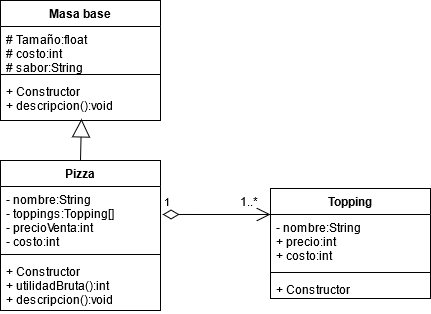

</div>



### 3.2. Usuario

Con base en la información de una persona, construye una clase de `Usuario` que herede de la clase `Persona`. Puedes guiarte del diagrama UML.

<div align="center">

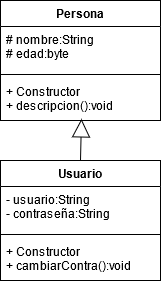

</div>



### 3.3. Empleado - Trabajo - Empresa

Construye la relación de clases entre los trabajadores y la empresa para la que trabajan. Puedes guiarte del diagrama UML.

<div align="center">

  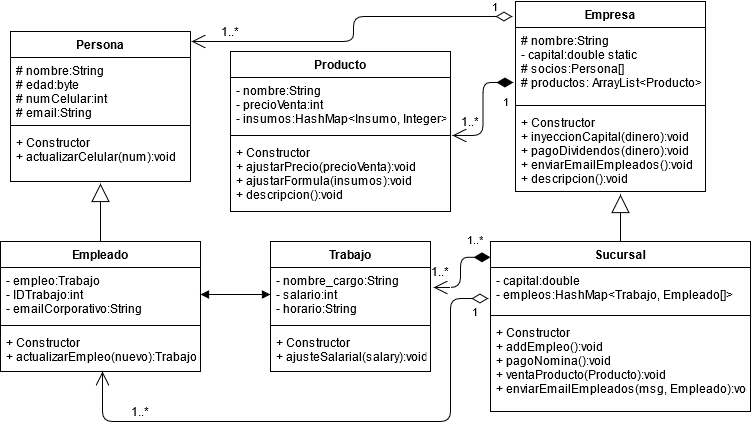

</div>